In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(100) # initialise random seed.

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from keras import Sequential
from keras.layers import Dense
import seaborn as sb
from datetime import datetime, timedelta
from IPython.display import set_matplotlib_formats
from pickle import dump
#set_matplotlib_formats('png') # set output format of matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.


In [2]:
#Check the data to get an understanding of data types before loading to pandas dataframe.

!head Bike-Sharing-Dataset/hour.csv
print()
!head Bike-Sharing-Dataset/day.csv

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.8,0,2,0,2
8,2011-01-01,1,0,1,7,0,6,0,1,0.2,0.2576,0.86,0,1,2,3
9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0,1,7,8

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.2,0.212122,0.59

In [3]:
df = pd.read_csv("Bike-Sharing-Dataset/hour.csv")
day = pd.read_csv("Bike-Sharing-Dataset/day.csv")

To understand the features and how they affect the demand of registered and casual users a bar graph is very useful.

For continuous features like temp, atemp, hum and windspeed we first divide the range of the available data into ten equal parts using pandas.cut and later by using groupby method of pandas we can sum up the count of registered and casual users. The count of the categorical features can be directly calculated by using groupby method.

In [37]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

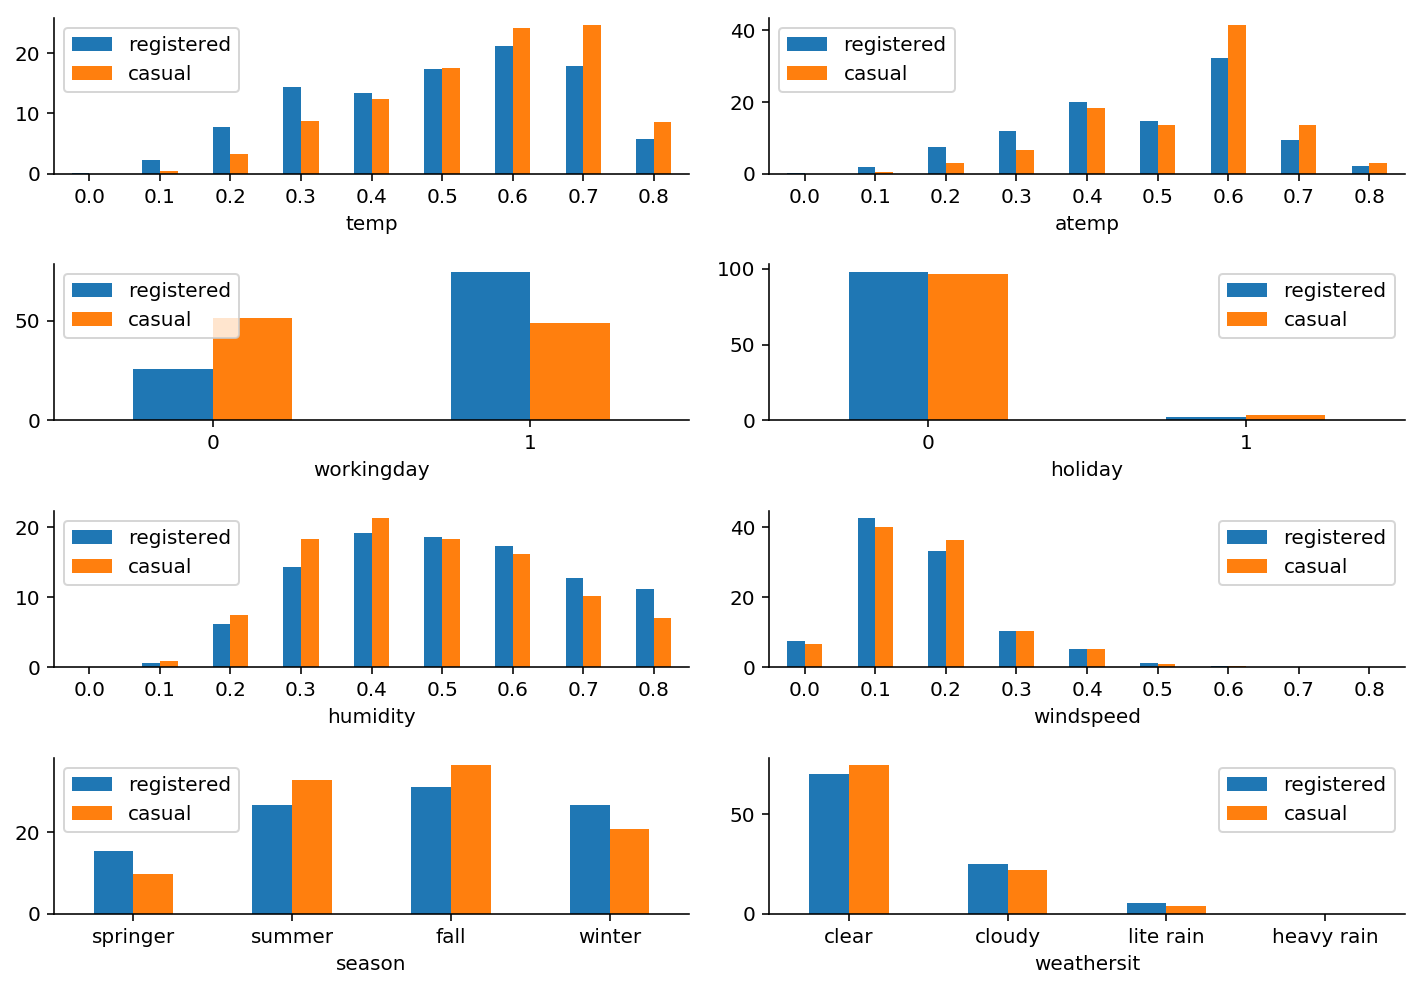

In [4]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(10,7))

# Pd.cut is used to devide the data into bins. Each bin is then grouped to get the count of data in each bin.
test = df.groupby(by=pd.cut(x=df.temp, bins=np.arange(0,1,0.1)))[["registered", "casual"]].sum()
test = np.round(test*100/test.sum(axis=0),1)
test.plot.bar(ax=ax[0,0])
ax[0,0].set_xlabel("temp")
ax[0,0].set_xticklabels(["0.0", "0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9"],
                       rotation="horizontal")

test = df.groupby(by=pd.cut(x=df.atemp, bins=np.arange(0,1,0.1)))[["registered", "casual"]].sum()
test = np.round(test*100/test.sum(axis=0),1)
test.plot.bar(ax=ax[0,1])
ax[0,1].set_xlabel("atemp")
ax[0,1].set_xticklabels(["0.0", "0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9"],
                       rotation="horizontal")

test = df.groupby(by="workingday")[["registered", "casual"]].sum()
test = np.round(test*100/test.sum(axis=0),1)
test.plot.bar(ax=ax[1,0])
ax[1,0].set_xlabel("workingday")
ax[1,0].set_xticklabels(["0", "1"], rotation="horizontal")

test = df.groupby(by="holiday")[["registered", "casual"]].sum()
test = np.round(test*100/test.sum(axis=0),1)
test.plot.bar(ax=ax[1,1])
ax[1,1].set_xlabel("holiday")
ax[1,1].set_xticklabels(["0", "1"], rotation="horizontal")

test = df.groupby(by=pd.cut(x=df.hum, bins=np.arange(0,1,0.1)))[["registered", "casual"]].sum()
test = np.round(test*100/test.sum(axis=0),1)
test.plot.bar(ax=ax[2,0])
ax[2,0].set_xlabel("humidity")
ax[2,0].set_xticklabels(["0.0", "0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9"],
                       rotation="horizontal")

test = df.groupby(by=pd.cut(x=df.windspeed, bins=np.arange(0,1,0.1)))[["registered", "casual"]].sum()
test = np.round(test*100/test.sum(axis=0),1)
test.plot.bar(ax=ax[2,1])
ax[2,1].set_xlabel("windspeed")
ax[2,1].set_xticklabels(["0.0", "0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9"],
                       rotation="horizontal")

test = df.groupby(by="season")[["registered", "casual"]].sum()
test = np.round(test*100/test.sum(axis=0),1)
test.plot.bar(ax=ax[3,0])
ax[3,0].set_xlabel("season")
ax[3,0].set_xticklabels(["springer", "summer", "fall", "winter"], rotation="horizontal")

test = df.groupby(by="weathersit")[["registered", "casual"]].sum()
test = np.round(test*100/test.sum(axis=0),1)
test.plot.bar(ax=ax[3,1])
ax[3,1].set_xlabel("weathersit")
ax[3,1].set_xticklabels(["clear", "cloudy", "lite rain", "heavy rain"], rotation="horizontal")


for axis in ax.ravel():
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)

fig.tight_layout()
plt.show()
fig.savefig("eda.svg", format='svg')

Holidays and rainy weather has a significant adverse effect on the demand.
Summer and Fall have a higher demand compared to other seasons; this could be due to good weather condition.
Steady increase in demand can be observed as the temperature rises

In [5]:
# Correlation of useful feature with respect to the demand
corr = df.drop(columns=["instant", "dteday", "casual", "registered", "cnt", "yr"]).corrwith(df.cnt)
corr

season        0.178056
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
dtype: float64

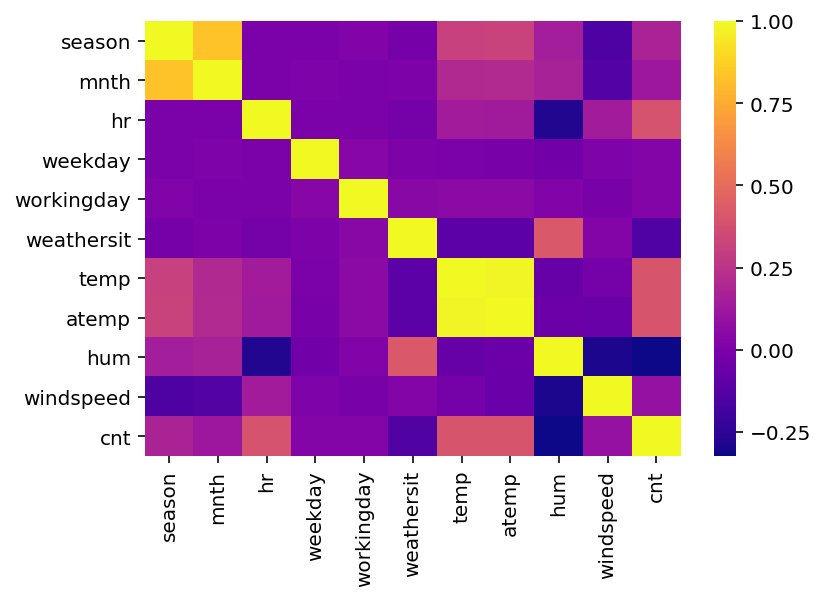

In [6]:
# Correlation of the features
corr = df.drop(columns=["instant", "dteday", "casual", "registered", "yr", "holiday"]).corr()
fig = sb.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap="plasma")
plt.show()

The hour of the day, temperature and weather conditions are strongly correlated to each other and to cnt compared to other features

Plot first-month usage along with the bad weather condition markers and non-working days.

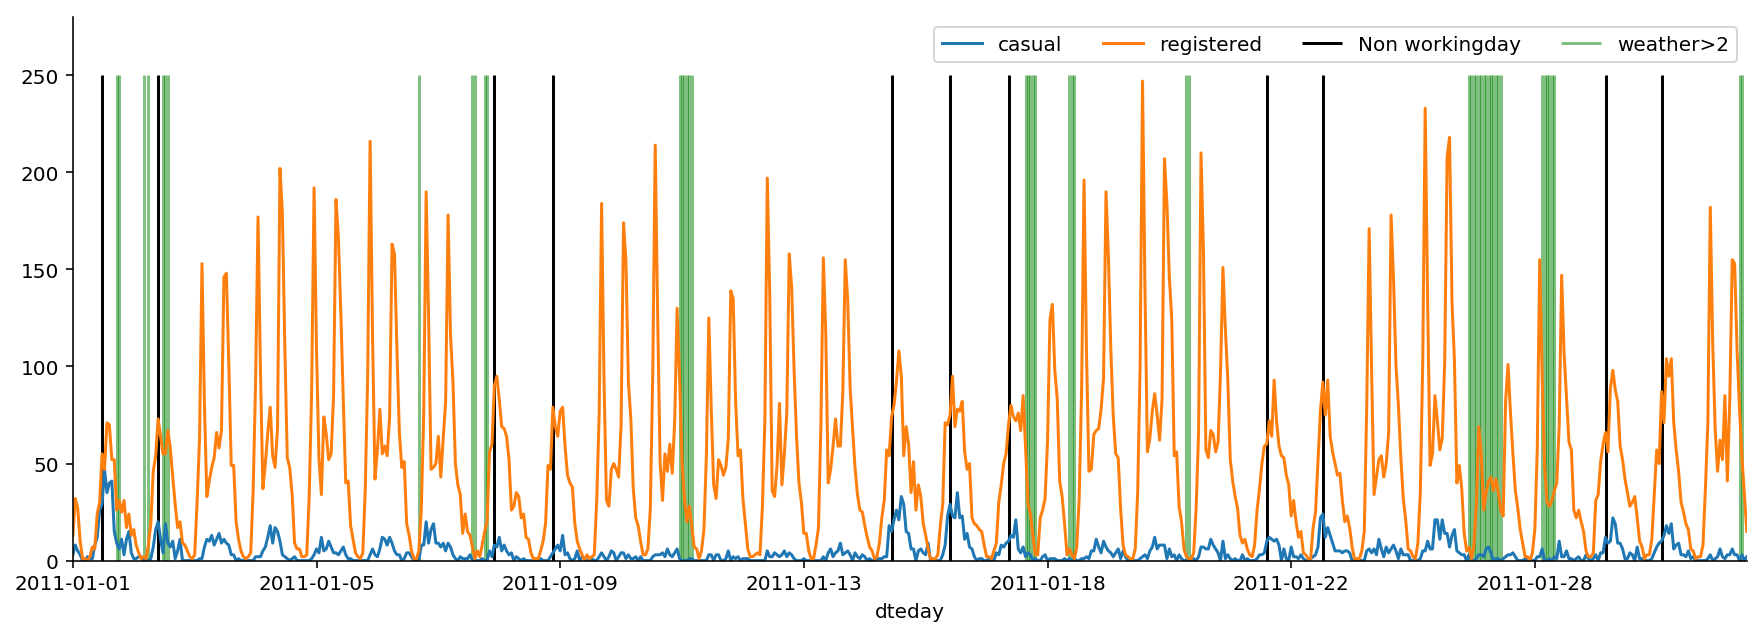

In [7]:
fig, ax = plt.subplots(1,1)

ax.vlines(x=df.query("workingday==0 & mnth==1 & yr==0 & hr==12").dteday.index,
          ymin=0, ymax=250, linestyles="solid", color="k", alpha=1)
ax.vlines(x=df.query("weathersit >2 & mnth==1 & yr==0").dteday.index,
          ymin=0, ymax=250, linestyles="solid", color="g", alpha=0.5)

df.query("mnth==1 & yr==0").plot(x="dteday", y=["casual", "registered"], figsize=(15,5), ax=ax )
ax.legend(["casual", "registered", "Non workingday","weather>2"], loc='upper right', ncol=4)
ax.set_ylim(0,280)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()
fig.savefig("sample.svg", format='svg')

We can observe the high demand during working days and we can also observe two peeks on working days. Casual user count is slightly higher on non-working days than usual.

Add two features to provide the future information about the weather and whether the next day is holiday.

In [8]:
def nextDay_fun(date, df):
    
    format_ = "%Y-%m-%d"
    date = datetime.strptime(date, format_) + timedelta(days=1)
    date = str(date.date())
    new_features = df.query(f"dteday == '{date}'")[["holiday", "weathersit"]].values
    if len(new_features)==0:
        return np.array([np.nan, np.nan])
    else:
        return new_features[0]
temp = [nextDay_fun(date, day) for date in df.dteday]
temp = pd.DataFrame(np.array(temp), columns=["is_nextDay_holiday", "nextDay_weather"])
df = pd.concat([df, temp], axis=1)
#The last day will not have future data and is filled with nan. Remove rows with nans.
df.dropna(axis=0, inplace=True)

In [9]:
corr = df.drop(columns=["instant", "dteday", "casual", "registered", "cnt", "yr"]).corrwith(df.cnt)
corr

season                0.177547
mnth                  0.121801
hr                    0.394184
holiday              -0.031036
weekday               0.026348
workingday            0.030696
weathersit           -0.142840
temp                  0.404559
atemp                 0.400711
hum                  -0.323057
windspeed             0.093079
is_nextDay_holiday   -0.023961
nextDay_weather      -0.048379
dtype: float64

Correlation of the new features with the demand is slightly negative. 

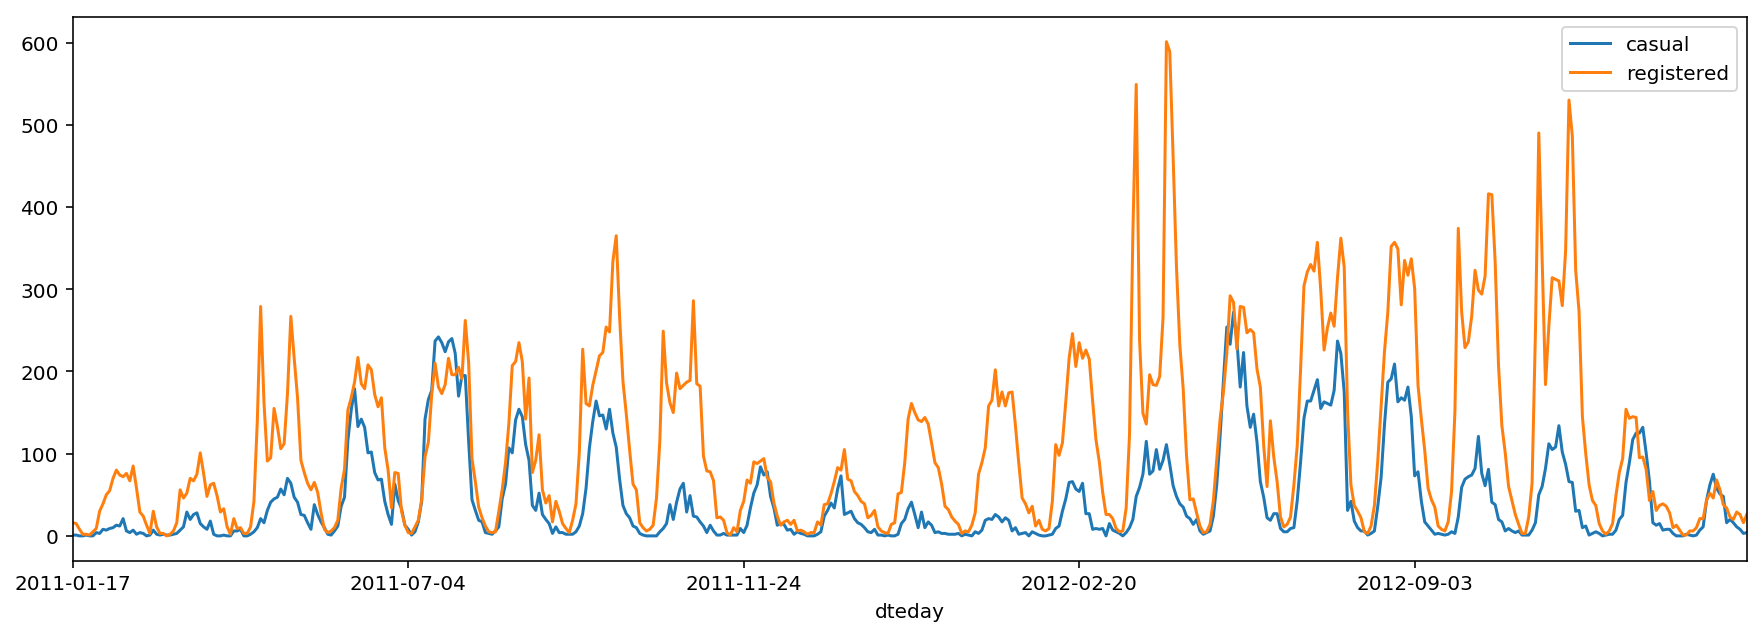

In [10]:
df.query("holiday==1").plot(x="dteday", y=["casual", "registered"], figsize=(15,5))
plt.show()

The demand on holidays by casual users is high in summers. Also, a gradual increase in demand by registered users can be observed. The availability of the total number of registered users might be helpful to predict the fraction of potential users.

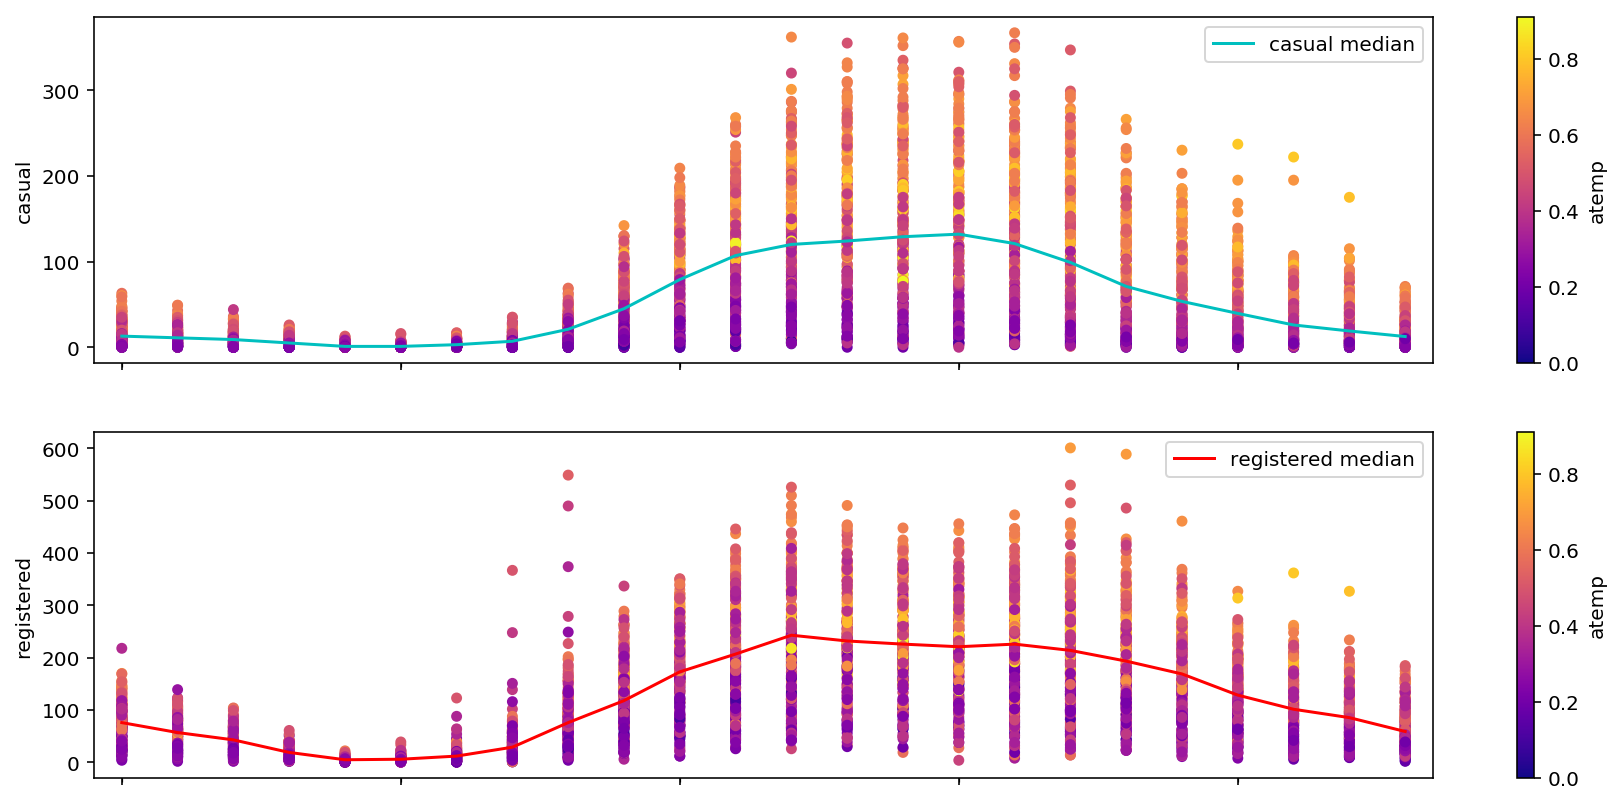

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False)
holiday = df.query("workingday==0")

holiday.plot.scatter(x="hr", y="casual", c="atemp", colormap='plasma', figsize=(15,7), ax=ax[0])
holiday.plot.scatter(x="hr", y="registered", c="atemp", colormap='plasma', figsize=(15,7), ax=ax[1])
holiday.groupby(by="hr").casual.median().plot(ax=ax[0], style="-c")
holiday.groupby(by="hr").registered.median().plot(ax=ax[1], style="-r")
ax[0].legend(["casual median"])
ax[1].legend(["registered median"])
ax[0].set_xlabel("Hours")
ax[0].set_xlim((-0.5,23.5))
ax[1].set_xlabel("Hours")
ax[1].set_xlim((-0.5,23.5))
plt.show()

The trend due to temperature can be seen for non working days, the  demand by both users is higher during mid day compared to a working day.

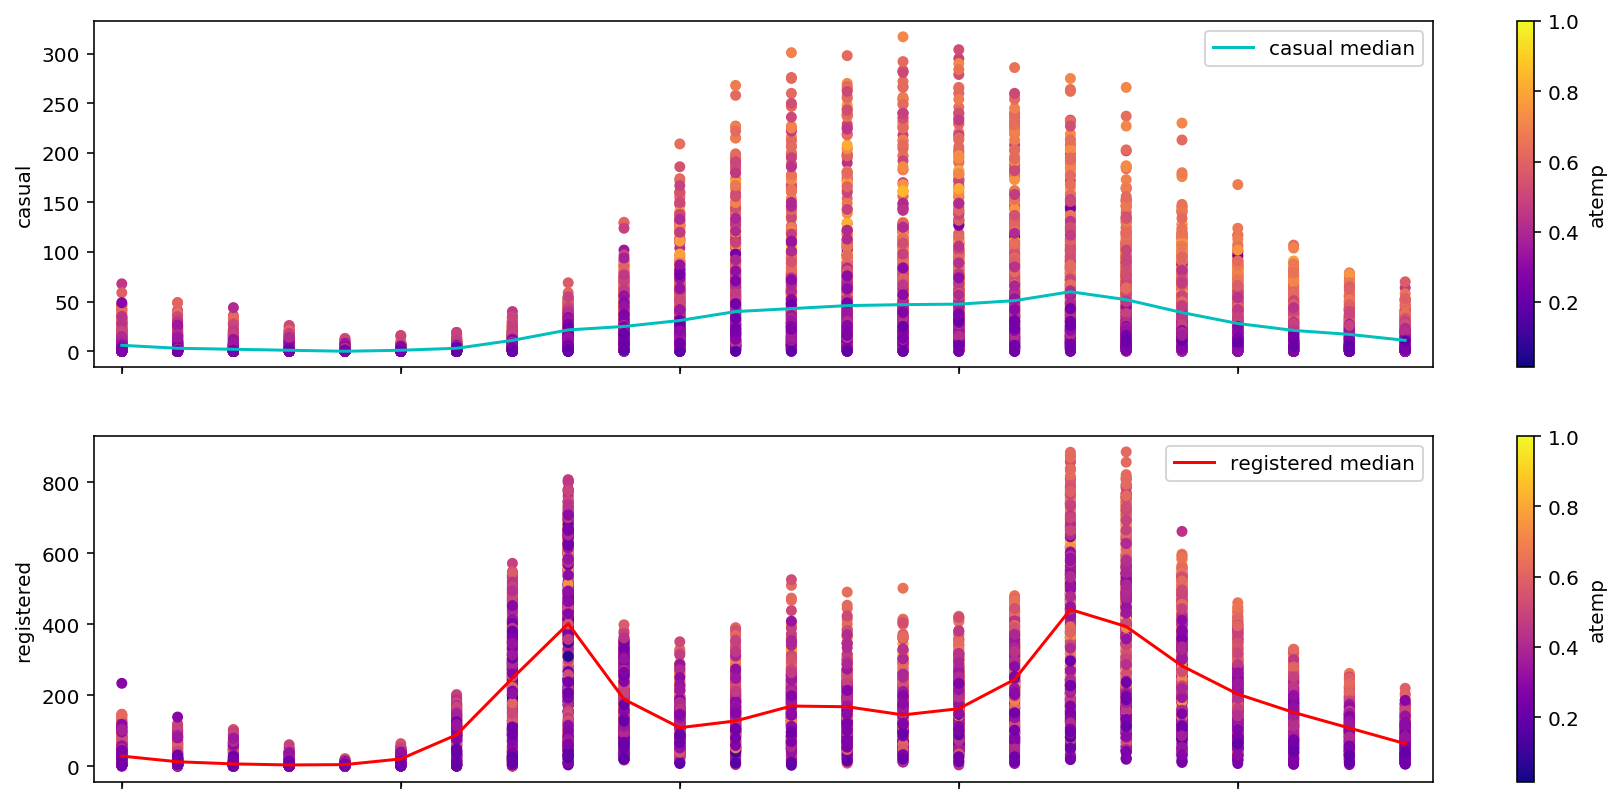

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False)
holiday = df.query("weekday<6 & holiday==0")

holiday.plot.scatter(x="hr", y="casual", c="atemp", colormap='plasma', figsize=(15,7), ax=ax[0])
holiday.plot.scatter(x="hr", y="registered", c="atemp", colormap='plasma', figsize=(15,7), ax=ax[1])
holiday.groupby(by="hr").casual.median().plot(ax=ax[0], style="-c")
holiday.groupby(by="hr").registered.median().plot(ax=ax[1], style="-r")
ax[0].legend(["casual median"])
ax[1].legend(["registered median"])
ax[0].set_xlabel("Hours")
ax[0].set_xlim((-0.5,23.5))
ax[1].set_xlabel("Hours")
ax[1].set_xlim((-0.5,23.5))
plt.show()

we can observe the trend of casual and registered users demand on working days distributed over hour of the day and temperature. The peak demand for registered users is between 0700 to 0900 and 1700 to 1900 hours. The median of the casual user demand is low, and the demand is increasing with temperature.

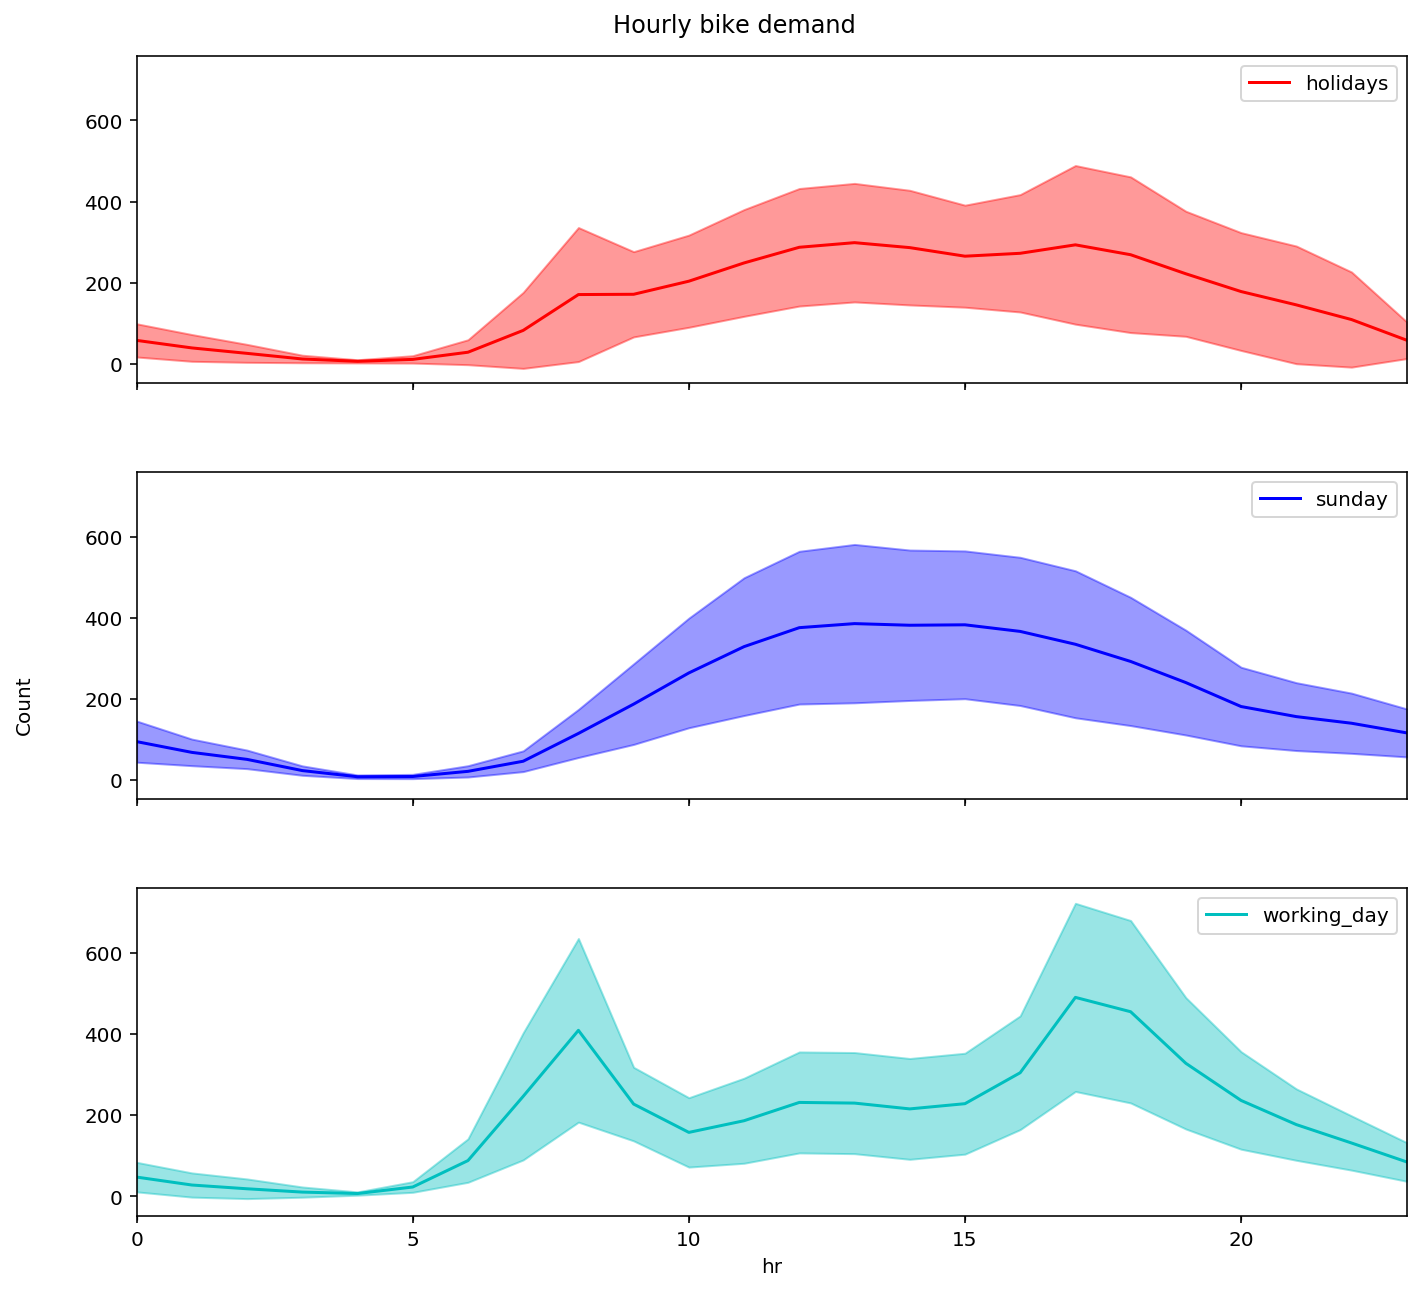

In [13]:
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True)
holidays = df.query("weekday<6 & holiday==1").groupby(by="hr").cnt
sunday = df.query("weekday==6").groupby(by="hr").cnt
working_day = df.query("weekday<6 & holiday==0").groupby(by="hr").cnt

holidays.mean().plot(ax=ax[0], style="-r")
ax[0].fill_between(x=holidays.mean().index,
                y1=holidays.mean() - holidays.std(),
                y2=holidays.mean() + holidays.std(), color='r', alpha=0.4)
ax[0].legend(["holidays"])

sunday.mean().plot(ax=ax[1], style="-b", legend="sunday")
ax[1].fill_between(x=sunday.mean().index,
                y1=sunday.mean() - sunday.std(),
                y2=sunday.mean() + sunday.std(), color='b', alpha=0.4)
ax[1].legend(["sunday"])


working_day.mean().plot(ax=ax[2], style="-c", legend="working_day")
ax[2].fill_between(x=working_day.mean().index,
                y1=working_day.mean() - working_day.std(),
                y2=working_day.mean() + working_day.std(), color='c', alpha=0.4)
ax[2].legend(["working_day"])


fig.suptitle("Hourly bike demand")
fig.tight_layout()
fig.set_size_inches(10, 10)
fig.text(0.0, 0.5, 'Count', va='center', rotation='vertical')
plt.show()

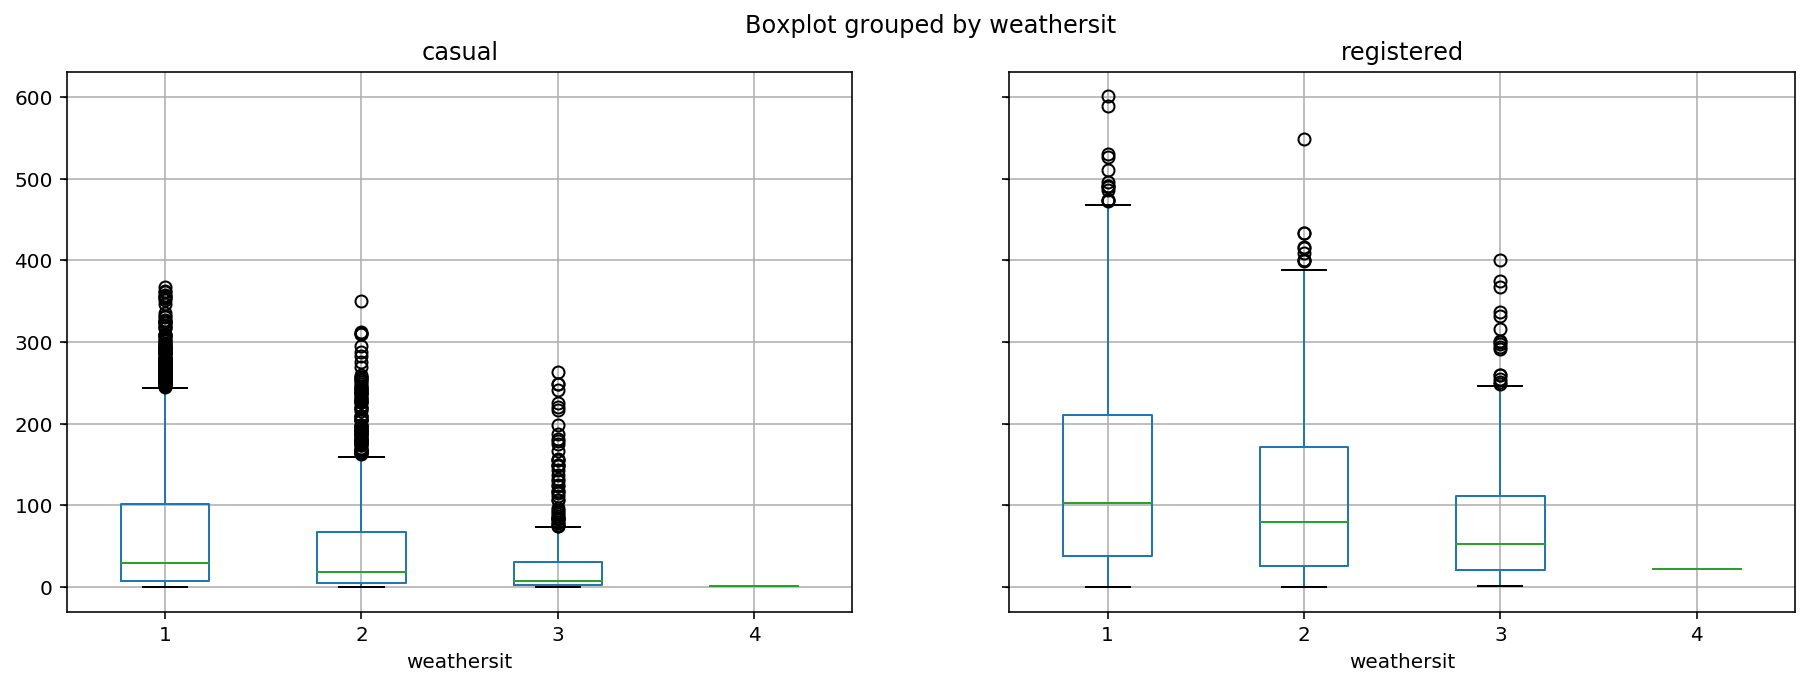

In [14]:
df.query("workingday==0").boxplot(by="weathersit", column=["casual", "registered"], figsize=(15,5))
plt.show()

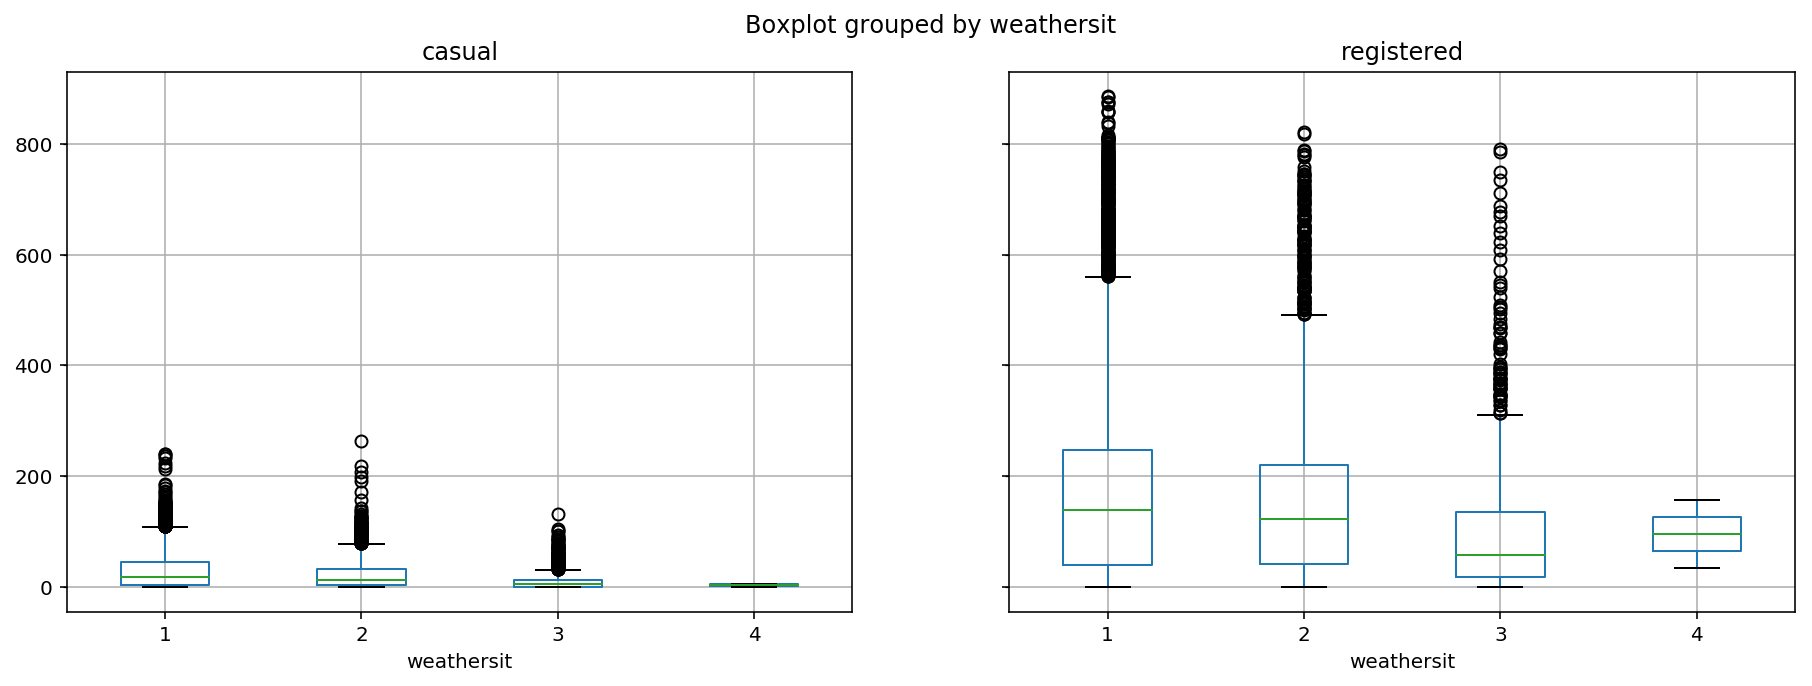

In [15]:
df.query("workingday==1").boxplot(by="weathersit", column=["casual", "registered"], figsize=(15,5))
plt.show()

On working days we can observe higher demand compared to non-working day even due to bad weather.

In [16]:
# Dividing dataset to test set, validation set and training set.
test = df.query("mnth==12 & yr==1").copy()
val = df.query("mnth==1 & yr==1").copy()
train = df.query("~(mnth>=11 & yr==1)").copy()

In [17]:
train = train.sample(frac=1, random_state=100) # shuffle the data randomly

In [18]:
#Separate the features and labels

drop_features = ["instant", "dteday", "casual", "registered", "cnt"]
train_x, train_reg, train_cas = train.drop(columns=drop_features), train.registered, train.casual
val_x, val_reg, val_cas = val.drop(columns=drop_features), val.registered, val.casual
test_x, test_reg, test_cas = test.drop(columns=drop_features), test.registered, test.casual

In [19]:
# Normalising each set with respect to the normalising parameters training set.

normaliser_reg = StandardScaler().fit(train_x.astype(np.float64))
train_x = normaliser_reg.transform(train_x.astype(np.float64))
val_x = normaliser_reg.transform(val_x.astype(np.float64))
test_x = normaliser_reg.transform(test_x.astype(np.float64))

# converting back to pandas dataframe
columns= train.drop(columns=drop_features).columns
train_x = pd.DataFrame(data=train_x, columns=columns)
val_x = pd.DataFrame(data=val_x, columns=columns)
test_x = pd.DataFrame(data=test_x, columns=columns)

In [20]:
# Keras sequential model
# Two models are used one for registered users and another for casual users.

model_reg = Sequential()
#Add first layer with units and input dimension equal to number of features, Activation rectified linear unit
model_reg.add(Dense(64, input_dim=train_x.shape[1], activation="relu"))
model_reg.add(Dense(32, activation="relu"))
model_reg.add(Dense(16, activation="relu"))
#To get the linear output (Regression) use linear activation.
model_reg.add(Dense(1, activation="linear"))
model_reg.compile(loss='mae', optimizer="adam")
model_reg.summary()

model_cas = Sequential()
model_cas.add(Dense(64, input_dim=train_x.shape[1], activation="relu"))
model_cas.add(Dense(32, activation="relu"))
model_cas.add(Dense(16, activation="relu"))
model_cas.add(Dense(1, activation="linear"))
model_cas.compile(loss='mae', optimizer="adam")
model_cas.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                960       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 3,585
Trainable params: 3,585
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                960       
__

In [21]:
#Fit model

model_reg.fit(train_x, train_reg, batch_size=16, epochs=100, verbose=False, validation_data=[val_x, val_reg])
model_cas.fit(train_x, train_cas, batch_size=16, epochs=100, verbose=False, validation_data=[val_x, val_cas])

Instructions for updating:
Use tf.cast instead.


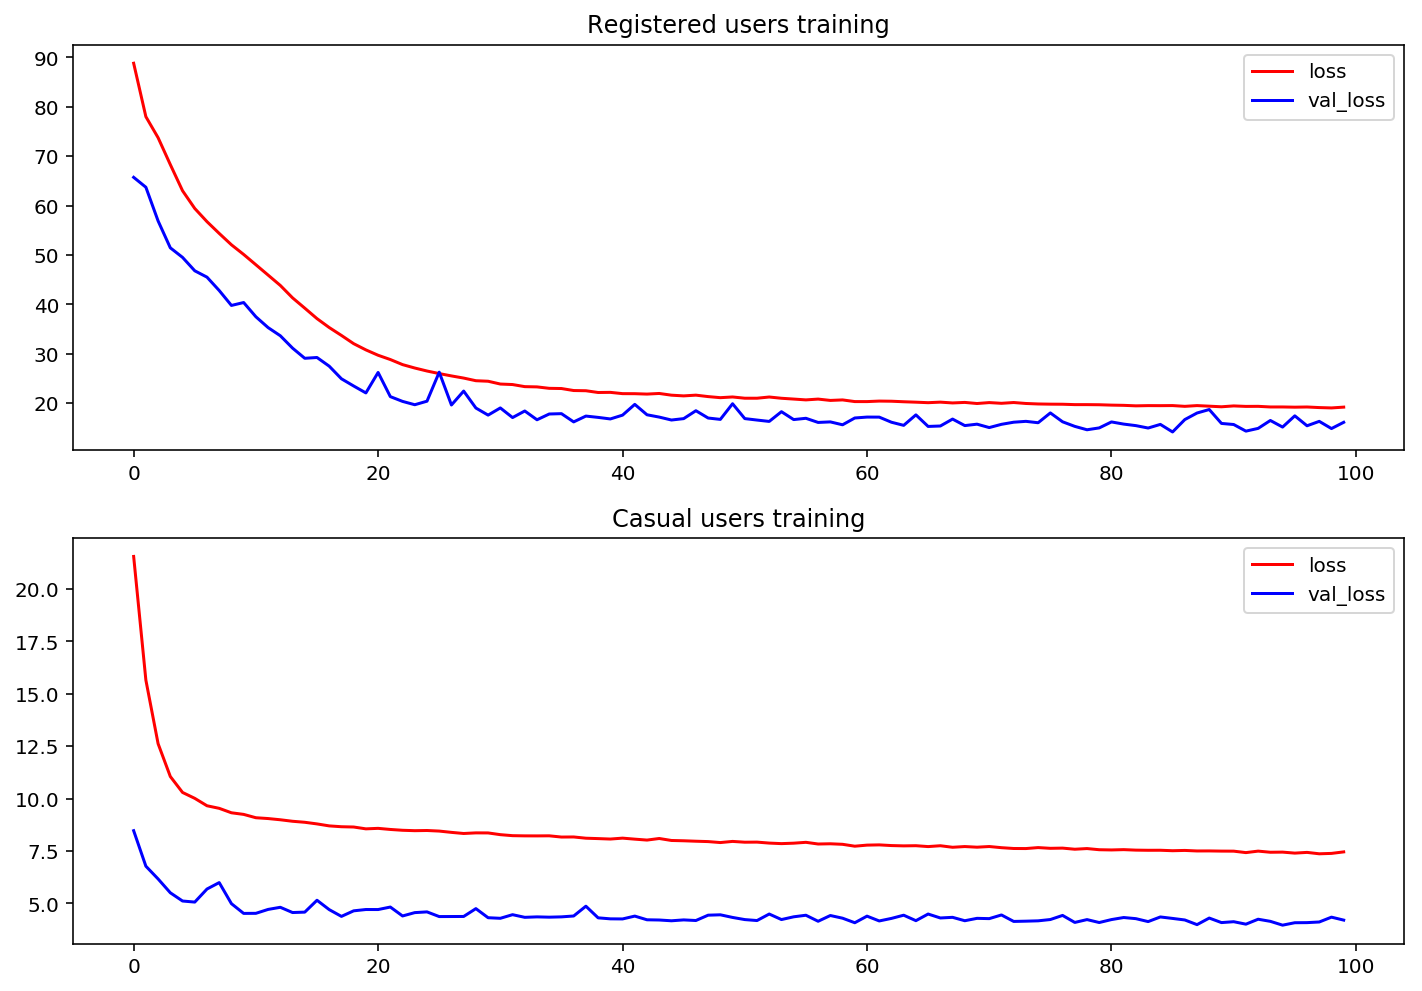

In [22]:
#Plot training loss and validation loss for both models.

fig, ax = plt.subplots(2,1, figsize=(10,7))

ax[0].plot(model_reg.history.history["loss"], "-r")
ax[0].plot(model_reg.history.history["val_loss"], "-b")
ax[0].legend(["loss", "val_loss"])
ax[0].set_title("Registered users training")

ax[1].plot(model_cas.history.history["loss"], "-r")
ax[1].plot(model_cas.history.history["val_loss"], "-b")
ax[1].legend(["loss", "val_loss"])
ax[1].set_title("Casual users training")
fig.tight_layout()
plt.show()

In [23]:
#Save models
dump(model_cas, open("model_cas", "wb"))
dump(model_reg, open("model_reg", "wb"))

In [24]:
# Calculating predictions

val_reg_predict = model_reg.predict(val_x)
test_reg_predict = model_reg.predict(test_x)

val_cas_predict = model_cas.predict(val_x)
test_cas_predict = model_cas.predict(test_x)

In [25]:
print("Validation score:", mean_absolute_error(val_reg_predict, val_reg.values))
print("Test set score:", mean_absolute_error(test_reg_predict, test_reg.values))

print("Validation score:", mean_absolute_error(val_cas_predict, val_cas.values))
print("Test set score:", mean_absolute_error(test_cas_predict, test_cas.values))

Validation score: 16.131261145296367
Test set score: 43.21622703732886
Validation score: 4.204455069282599
Test set score: 8.309189860244647


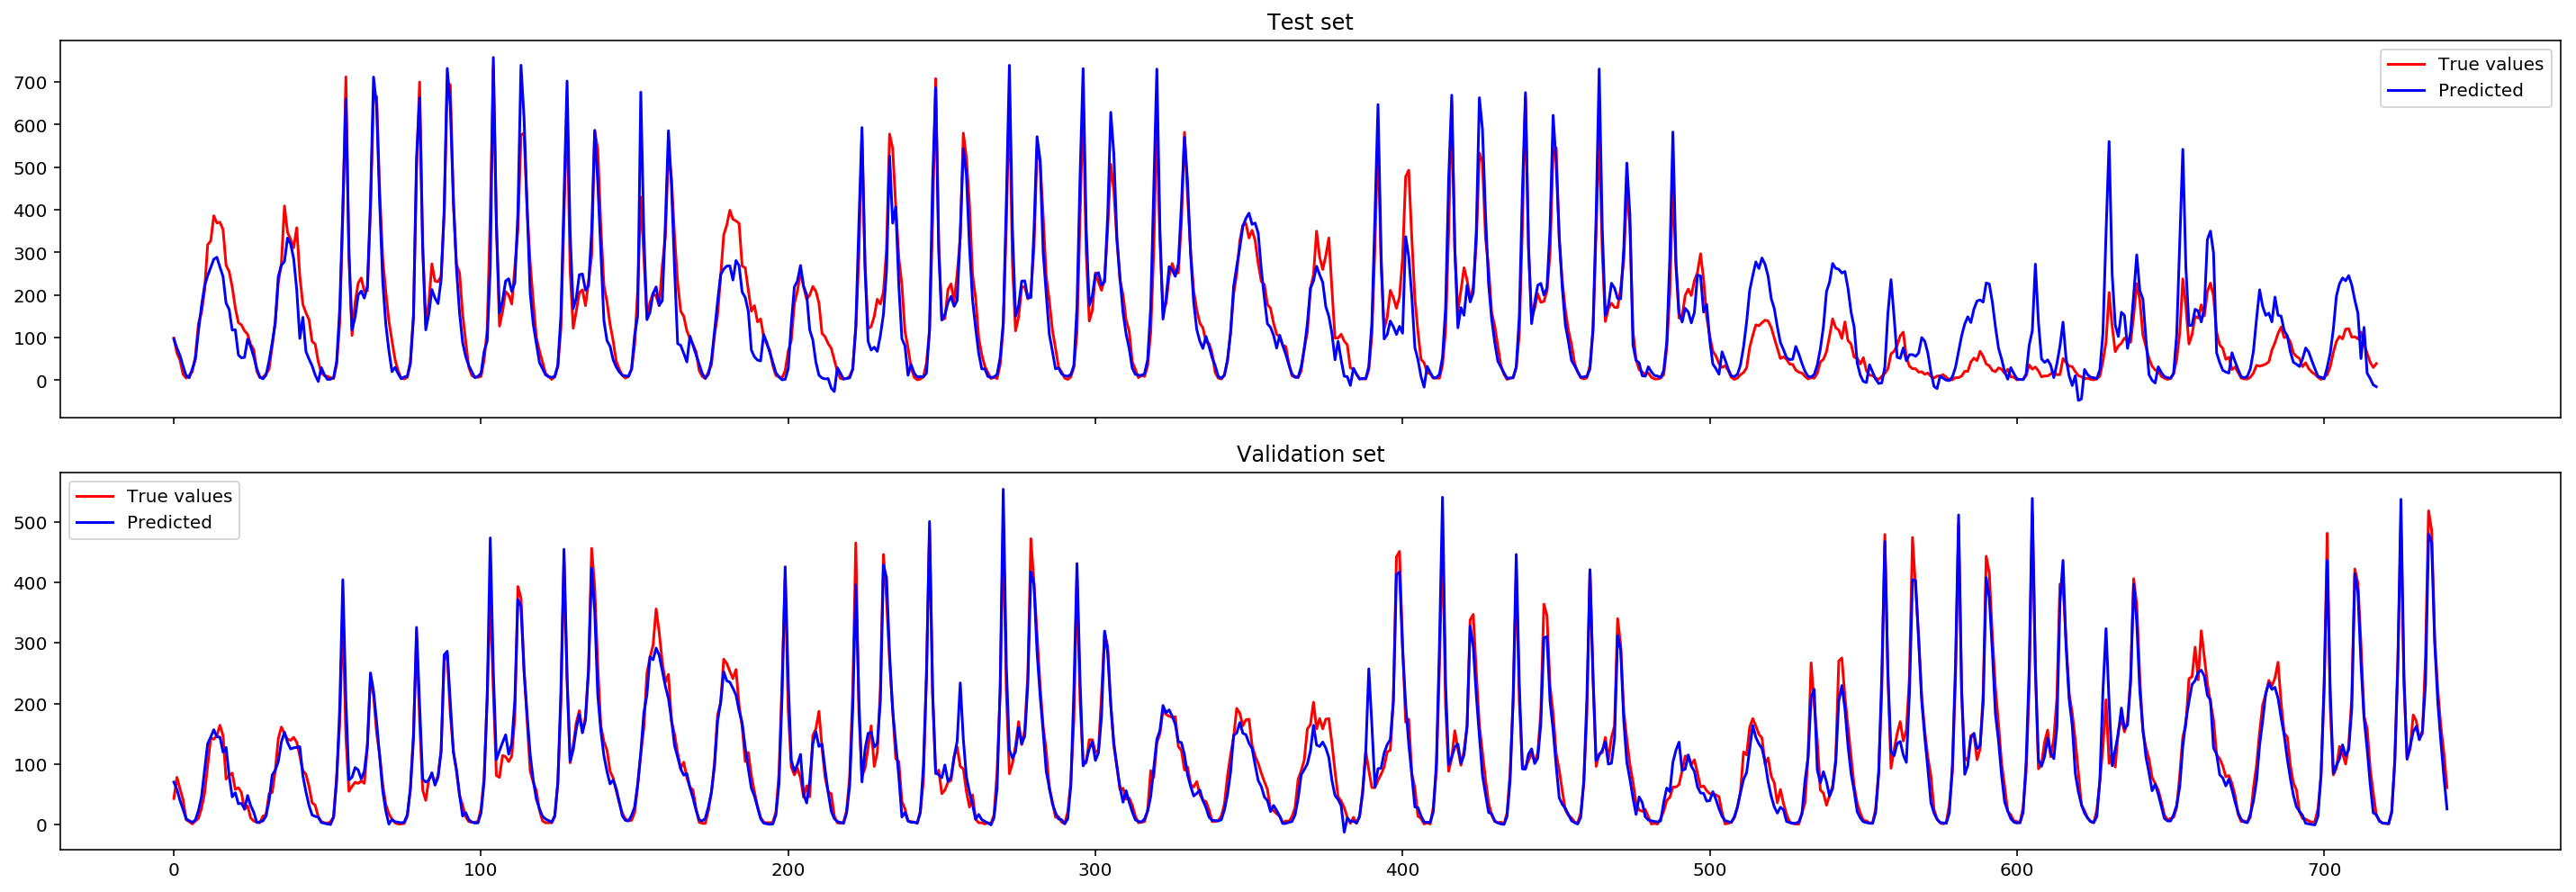

In [26]:
fig, ax = plt.subplots(2,1, figsize=(20,7), sharex=True)
ax[0].plot(test_reg.values,  "-r")
ax[0].plot(test_reg_predict, "-b")
ax[0].legend(["True values", "Predicted"])
ax[0].set_title("Test set")

ax[1].plot(val_reg.values,  "-r")
ax[1].plot(val_reg_predict, "-b")
ax[1].legend(["True values", "Predicted"])
ax[1].set_title("Validation set")
fig.tight_layout()
plt.show()

Test set prediction: As expected the model is unable to predict satisfactorily during festival season in December.
Validation set prediction: The model is able to fit for the peak demands on working days and regular demand on holidays in November

Casual user demand prediction

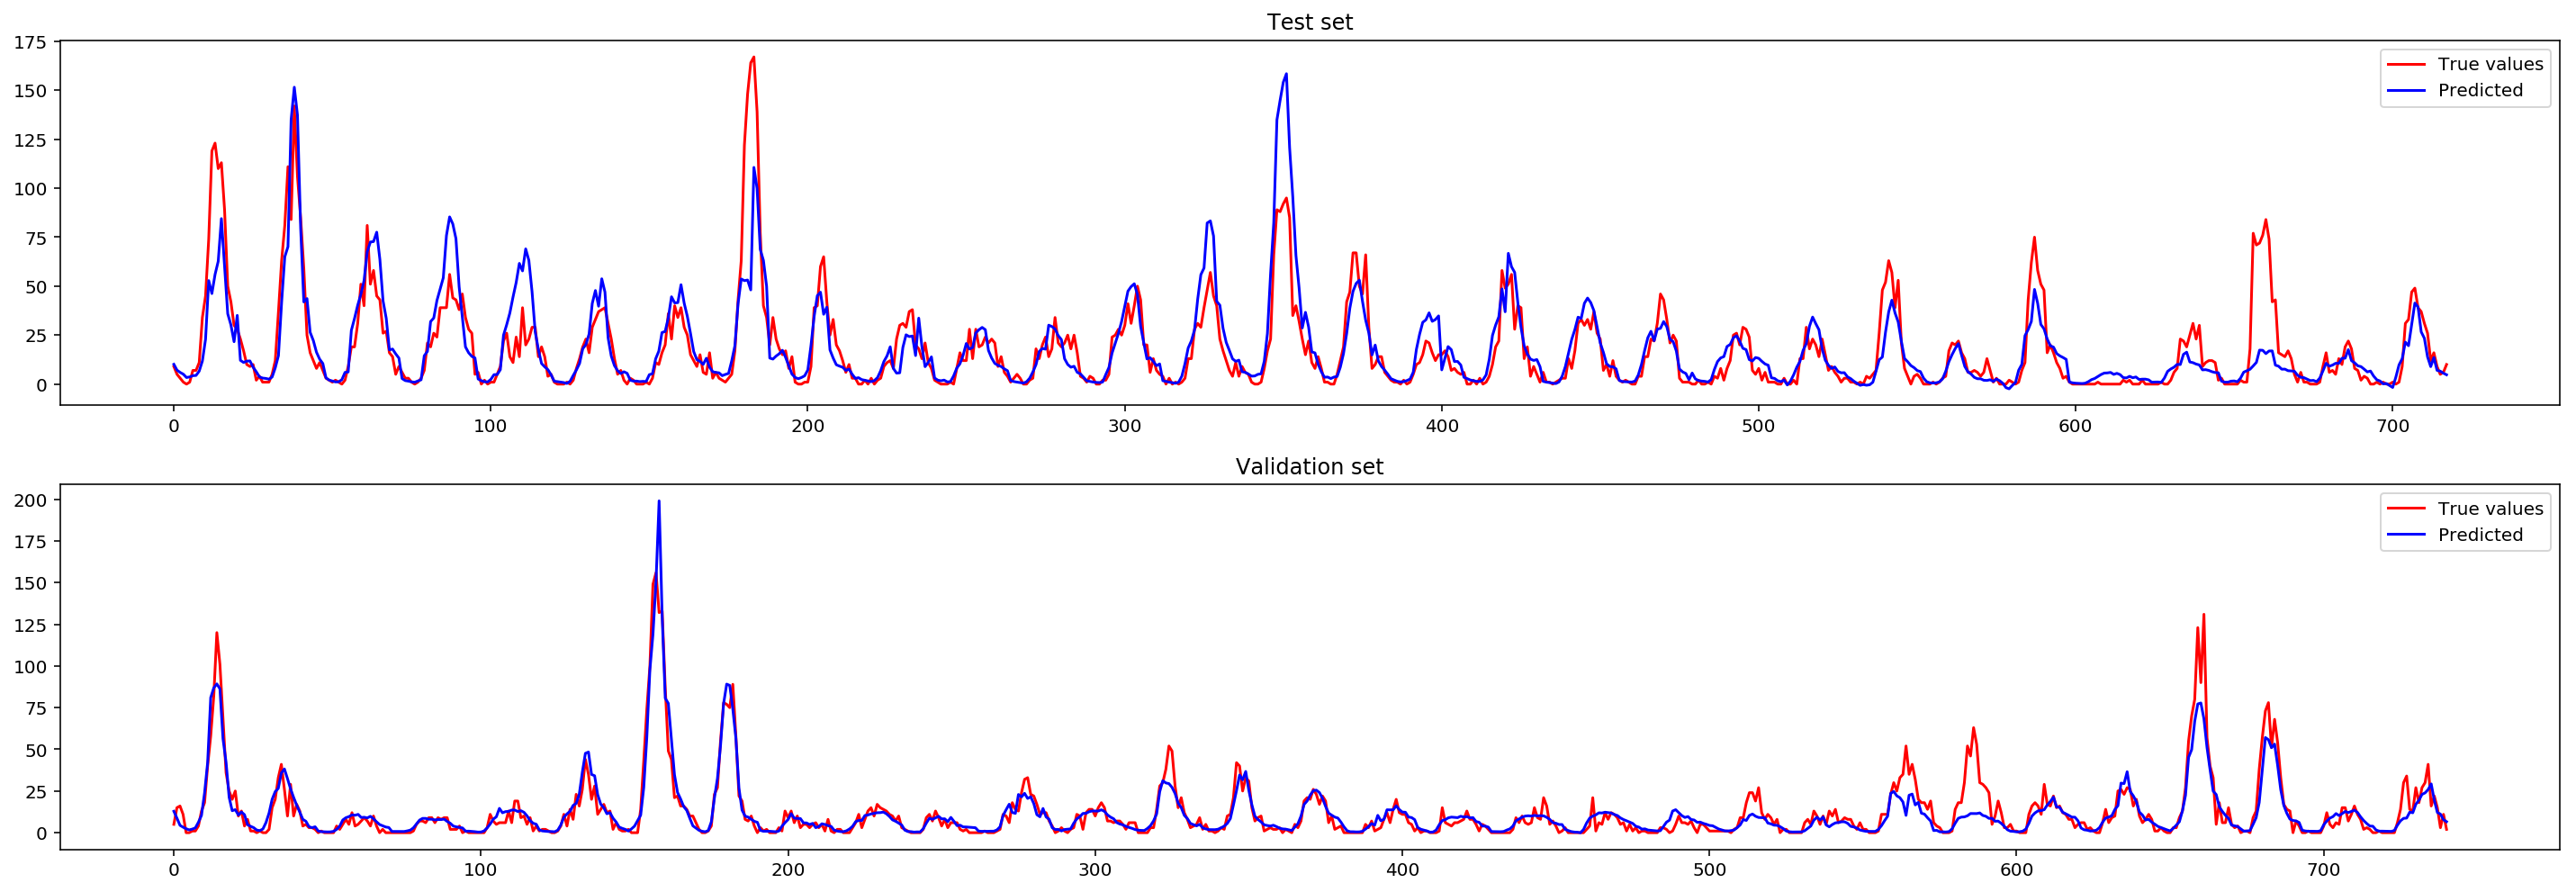

In [27]:
fig, ax = plt.subplots(2,1, figsize=(20,7))
ax[0].plot(test_cas.values,  "-r")
ax[0].plot(test_cas_predict, "-b")
ax[0].legend(["True values", "Predicted"])
ax[0].set_title("Test set")

ax[1].plot(val_cas.values,  "-r")
ax[1].plot(val_cas_predict, "-b")
ax[1].legend(["True values", "Predicted"])
ax[1].set_title("Validation set")
fig.tight_layout()
plt.show()

The model is able to smooth out the noisy peeks and able to reasonably generalised to the casual user behaviour.

Combining prediction from both models

In [28]:
cnt_val_predict = val_reg_predict+val_cas_predict
cnt_test_predict = test_reg_predict+test_cas_predict

In [29]:
print("Validation score:", mean_absolute_error(cnt_val_predict, val.cnt.values))
print("Test score:", mean_absolute_error(cnt_test_predict, test.cnt.values))

Validation score: 17.734850081998488
Test score: 45.69504994369815


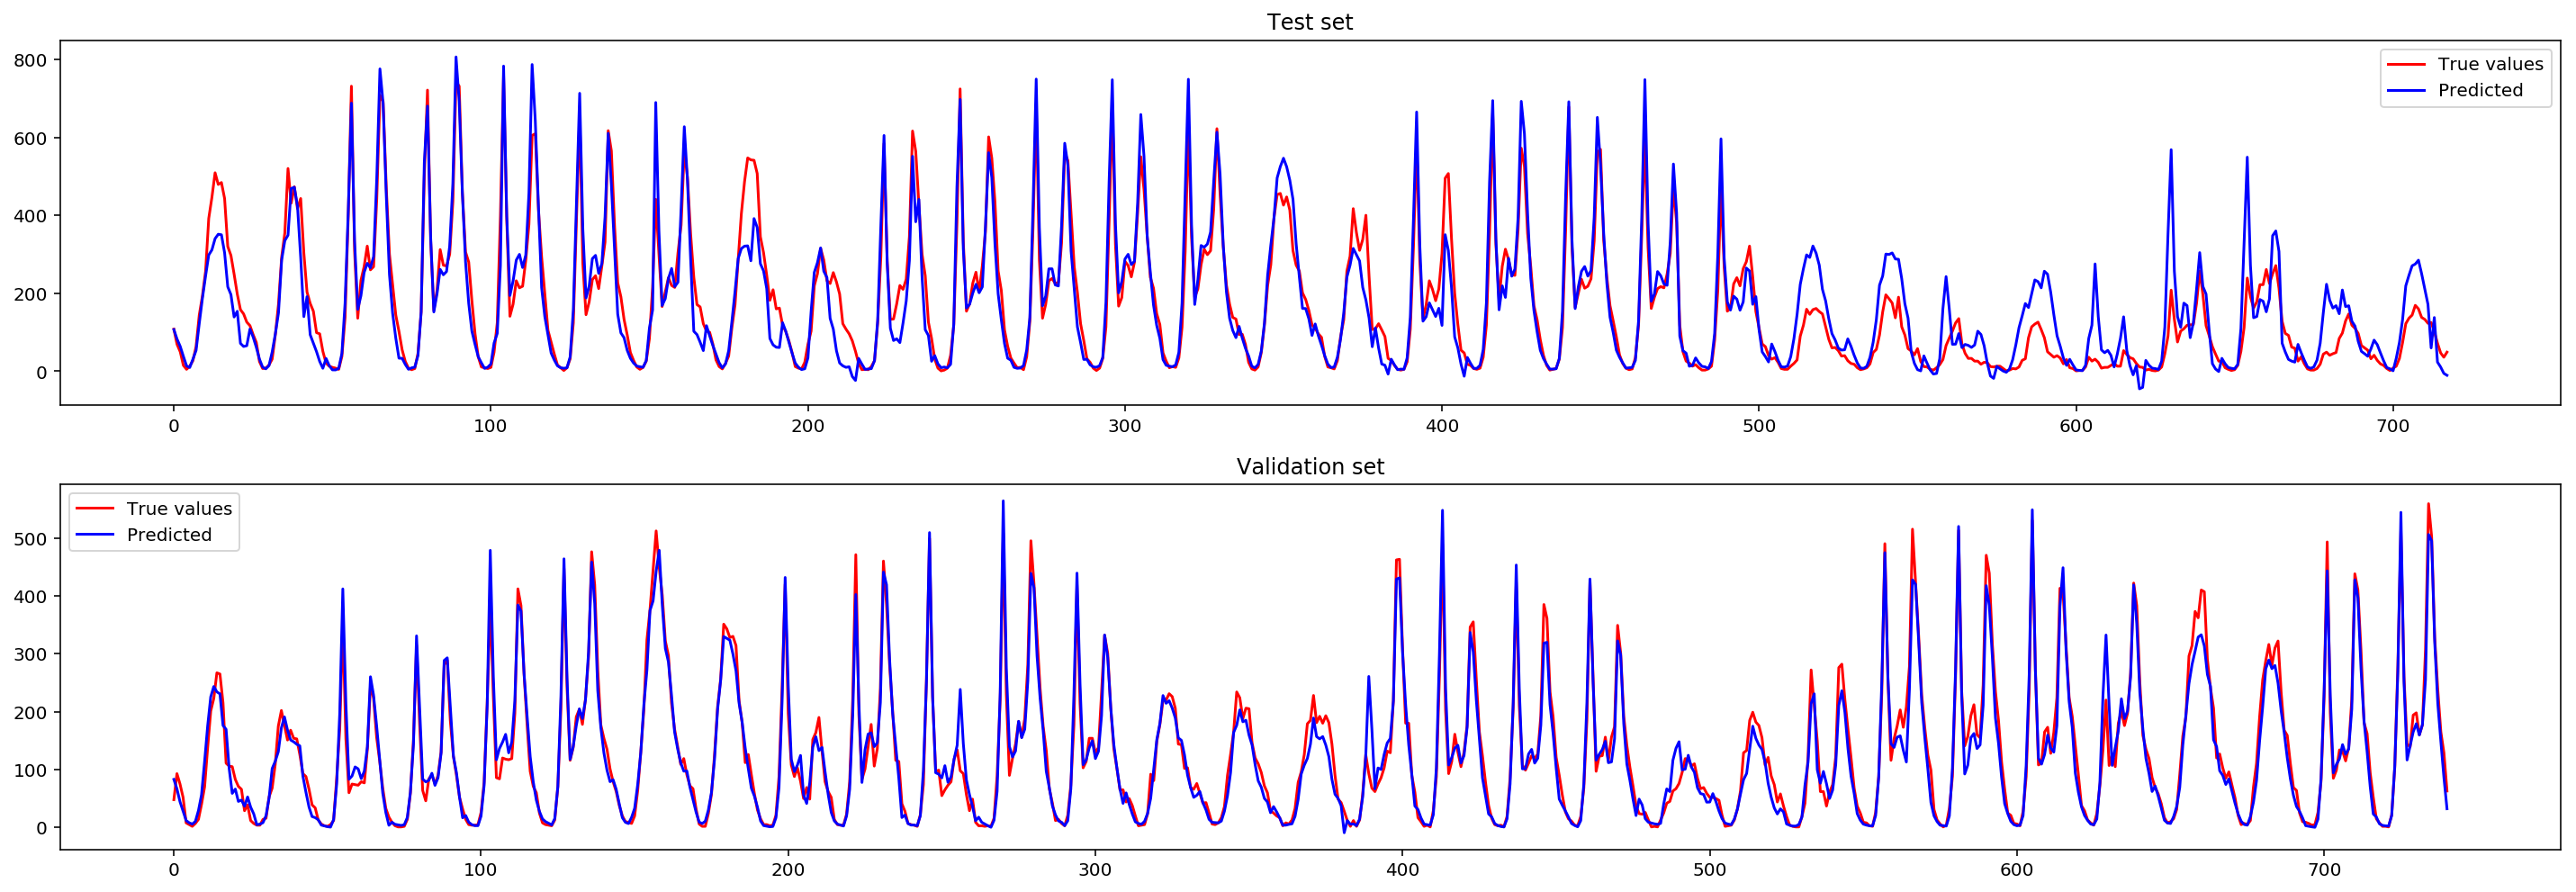

In [30]:
fig, ax = plt.subplots(2,1, figsize=(20,7))
ax[0].plot(test.cnt.values,  "-r")
ax[0].plot(cnt_test_predict, "-b")
ax[0].legend(["True values", "Predicted"])
ax[0].set_title("Test set")

ax[1].plot(val.cnt.values,  "-r")
ax[1].plot(cnt_val_predict, "-b")
ax[1].legend(["True values", "Predicted"])
ax[1].set_title("Validation set")
fig.tight_layout()
plt.show()